In [34]:
'''
Loading libraries
'''
import sys
sys.path.append('../../SPGPylibs/')
import SPGPylibs as spg
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits as pyfits
from scipy.ndimage import gaussian_filter



In [23]:
"""
loading data file names and reading darks current
"""
directory = './'
files = sorted(spg.list_fits(directory,contain = 'fdt-ilam_2'))
print('There are',len(files),'flat files [shall be 9]')
print(iter(files),files[0])

dark_path = '/Users/orozco/Dropbox_folder/Python/VS-GitHub/CAL_DATA/DARKS/'
dark_file = f'{dark_path}solo_L1_phi-hrt-dark_20210428T130238_V202207012038C_0164281001.fits.gz'

prefilter_path = '/Users/orozco/Dropbox_folder/Python/VS-GitHub/CAL_DATA/PREFILTER/'
prefilter_file = f'{prefilter_path}0000990710_noMeta.fits'


There are 9 flat files [shall be 9]
<list_iterator object at 0x128a87950> .//solo_L1_phi-fdt-ilam_20210913T060003_V202111172120C_0169130100.fits


In [ ]:
#only dark current
for i in files:
    spg.fdt_flat_preprocessing(i, dark_file, verbose = True,correct_ghost = False,correct_prefilter = False,
        prefilter_fits = prefilter_file, version = '01')

In [ ]:
directory = './'
files = sorted(spg.list_fits(directory,contain = '_V01_'))
print('There are',len(files),'flat files [shall be 9]')
print(iter(files),files[0])

# calculate flat
import itertools
allgain = []
norma = np.zeros((24))
for wavelength, npol in itertools.product(range(6), range(4)):
  print(wavelength,npol,'................')
  gain, norma_out = spg.fdt_flat(files, wavelength, npol, method = 'kll', r_shifts = 1, shifts_file = 'shifts_sep_' ,normalize = 0,
      expand = 20,iter = 5,verbose = 0,disp_method = 'circle',steps = -1) #,clv=0.9

  allgain.append(gain)
  plt.imshow(gain)
  plt.show()

with pyfits.open(files[0]) as hdu_list:
  hdu_list[0].data = allgain
  hdu_list.writeto('september_flat_v1.0_k1a.fits', clobber=True)

In [ ]:
# dark current and prefilter
for i in files:
    spg.fdt_flat_preprocessing(i, dark_file, verbose = True,correct_ghost = False,correct_prefilter = True,
        prefilter_fits = prefilter_file, version = '02')

In [ ]:
directory = './'
files = sorted(spg.list_fits(directory,contain = '_V02_'))
print('There are',len(files),'flat files [shall be 9]')
print(iter(files),files[0])

# calculate flat
import itertools
allgain = []
norma = np.zeros((24))
for wavelength, npol in itertools.product(range(6), range(4)):
  print(wavelength,npol,'................')
  gain, norma_out = spg.fdt_flat(files, wavelength, npol, method = 'kll', r_shifts = 1, shifts_file = 'shifts_sep_' ,normalize = 0,
      expand = 20,iter = 5,verbose = 0,disp_method = 'circle',steps = -1) #,clv=0.9

  allgain.append(gain)
  plt.imshow(gain)
  plt.show()

with pyfits.open(files[0]) as hdu_list:
  hdu_list[0].data = allgain
  hdu_list.writeto('september_flat_v1.0_k2a.fits', clobber=True)

In [ ]:
# dark current and prefilter
for i in files:
    spg.fdt_flat_preprocessing(i, dark_file, verbose = True,correct_ghost = True,correct_prefilter = True,
        prefilter_fits = prefilter_file, version = '03')

In [ ]:
directory = './'
files = sorted(spg.list_fits(directory,contain = '_V02_'))
print('There are',len(files),'flat files [shall be 9]')
print(iter(files),files[0])

# calculate flat
import itertools
allgain = []
norma = np.zeros((24))
for wavelength, npol in itertools.product(range(6), range(4)):
  print(wavelength,npol,'................')
  gain, norma_out = spg.fdt_flat(files, wavelength, npol, method = 'kll', r_shifts = 1, shifts_file = 'shifts_sep_' ,normalize = 0,
      expand = 20,iter = 5,verbose = 0,disp_method = 'circle',steps = -1) #,clv=0.9

  allgain.append(gain)
  plt.imshow(gain)
  plt.show()

with pyfits.open(files[0]) as hdu_list:
  hdu_list[0].data = allgain
  hdu_list.writeto('september_flat_v1.0_k5a.fits', clobber=True)

In [ ]:
d,hd = spg.fits_get('september_flat_v1.0_k1a.fits',scale=False)
d = np.reshape(d,(6,4,2048,2048))

dd = spg.phi_apply_demodulation(d,'FDT40',verbose = True)
spg.show_all2(dd,rng=3)

Demodulation matrix for  FDT40
[[ 0.16559717  0.36621064  0.17106811  0.29602755]
 [ 0.56854971  0.25095826 -0.34137648 -0.48025649]
 [-0.5408319   0.38391054  0.58947885 -0.43166375]
 [-0.35135625  0.46441998 -0.58284213  0.4637898 ]]


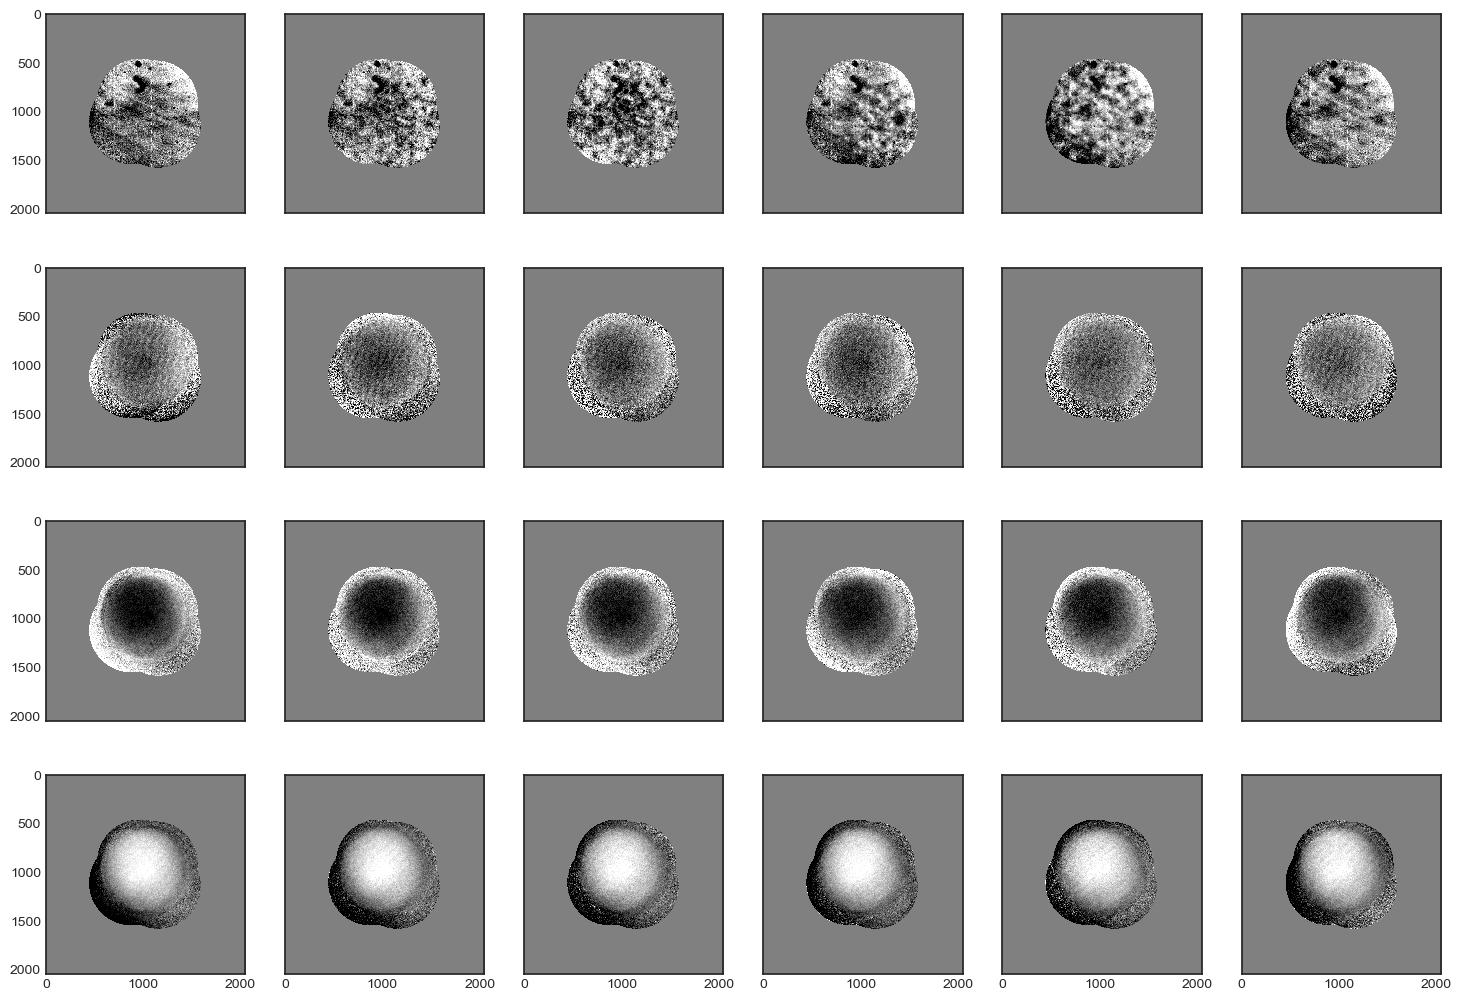

In [16]:
d2,hd = spg.fits_get('september_flat_v1.0_k2a.fits',scale=False)
d2 = np.reshape(d2,(6,4,2048,2048))

dd2 = spg.phi_apply_demodulation(d2,'FDT40',verbose = True)
spg.show_all2(dd2,rng=3)

In [ ]:
d3,hd = spg.fits_get('september_flat_v1.0_k5a.fits',scale=False)
d3 = np.reshape(d3,(6,4,2048,2048))

dd3 = spg.phi_apply_demodulation(d3,'FDT40',verbose = True)
spg.show_all2(dd3,rng=3)

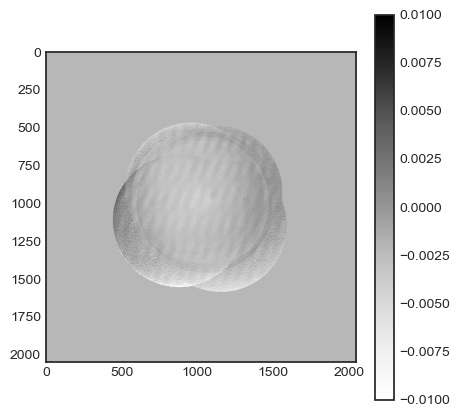

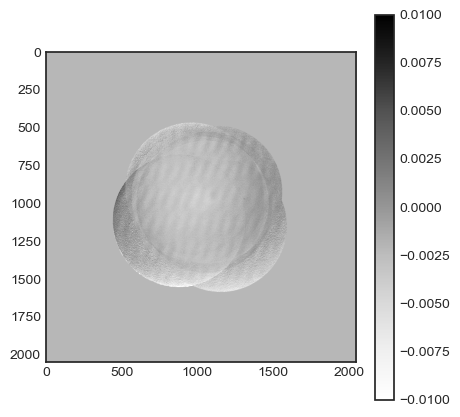

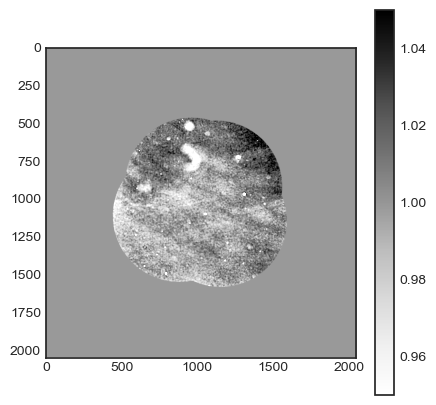

In [19]:
plt.imshow(dd[0,1,:,:],clim=(-0.01,0.01))
plt.colorbar()
plt.show()
plt.imshow(dd2[0,1,:,:],clim=(-0.01,0.01))
plt.colorbar()
plt.show()
plt.imshow(dd3[0,1,:,:],clim=(-0.01,0.01))
plt.colorbar()
plt.show()

In [ ]:
# d,hd = spg.fits_get('flat_september_april2022_ch.fits')
# d = np.reshape(d,(6,4,2048,2048))

# dd = np.copy(d)
# dd = spg.phi_apply_demodulation(dd,'FDT40',verbose = True)
# show_all(dd,rng=3)

In [21]:
# hdu_list = pyfits.open(files[0]) 
# hdu_list[0].data = allgain
# hdu_list.writeto('flat_september_april2022_ch.fits', clobber=True)
# #con nombre solo_L1_phi-fdt-flatm_20210913T060003_V202203031331C_0169131100.fits
# #generate new flats....

c,hd = spg.fits_get('september_flat_v1.0_k1a.fits',scale=False)
c = np.reshape(c,(6,4,2048,2048))

c_Imean = np.copy(c)
for i in range(6):
    mm = np.mean(c_Imean[i,:,:,:],axis = 0)
    c_Imean[i,:,:,:] = mm[np.newaxis,:,:]
c_Imean = np.reshape(c_Imean,(6*4,2048,2048))

with pyfits.open('september_flat_v1.0_k1a.fits') as hdu_list:
    hdu_list[0].data = c_Imean
    hdu_list.writeto('september_flat_v1.0_k2a.fits', clobber=True)

cc = spg.phi_apply_demodulation(c,'FDT40',verbose = True)

Imod = np.copy(cc)
for i in range(6):
    for j in range(1,4):
        Imod[i,j,:,:] = Imod[i,0,:,:]

Imod = np.reshape(Imod,(6*4,2048,2048))

with pyfits.open('september_flat_v1.0_k1a.fits') as hdu_list:
    hdu_list[0].data = Imod
    hdu_list.writeto('september_flat_v1.0_k2b.fits', clobber=True)

Demodulation matrix for  FDT40
[[ 0.16559717  0.36621064  0.17106811  0.29602755]
 [ 0.56854971  0.25095826 -0.34137648 -0.48025649]
 [-0.5408319   0.38391054  0.58947885 -0.43166375]
 [-0.35135625  0.46441998 -0.58284213  0.4637898 ]]


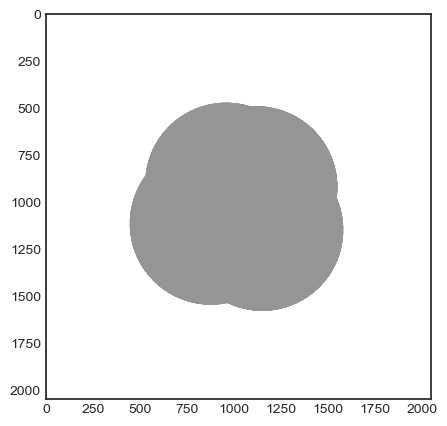

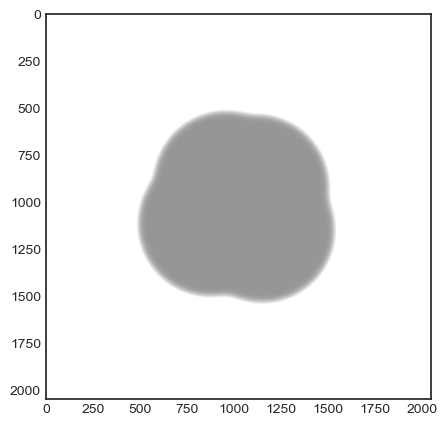

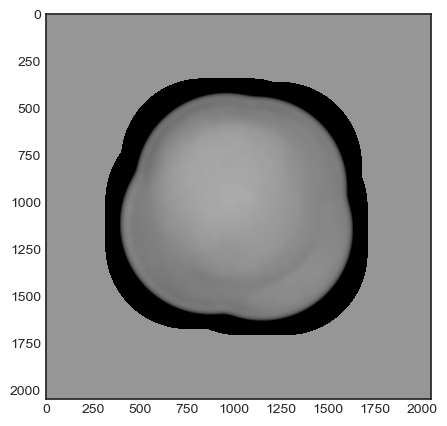

Demodulation matrix for  FDT40
[[ 0.16559717  0.36621064  0.17106811  0.29602755]
 [ 0.56854971  0.25095826 -0.34137648 -0.48025649]
 [-0.5408319   0.38391054  0.58947885 -0.43166375]
 [-0.35135625  0.46441998 -0.58284213  0.4637898 ]]


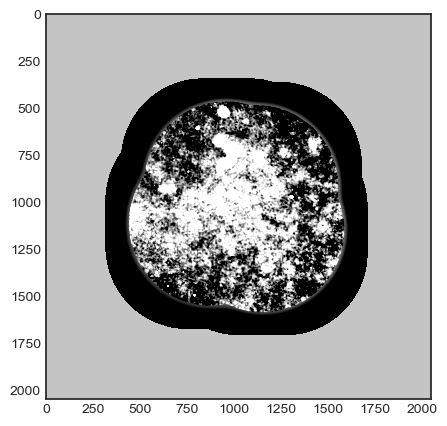

In [46]:
cc_mask_idx = np.where(cc[0,0,:,:] == c[0,0,0,0])
cc_mask = np.ones_like(cc[0,0,:,:])
cc_mask[cc_mask_idx] = 0

BLURR = 15
mask_blurred = gaussian_filter(cc_mask, sigma=(BLURR, BLURR))#, truncate=3.5)

Iblurr = np.copy(cc)
for i in range(6):
    for j in range(1,4):
        Iblurr[i,j,:,:] = gaussian_filter(Iblurr[i,j,:,:], sigma=(BLURR, BLURR))/mask_blurred
Iblurr[np.bitwise_not(np.isfinite(Iblurr))] = 0

Iblurr_mod = spg.phi_apply_demodulation(Iblurr,'FDT40',verbose = False,modulate=True)

Iblurr_mod = np.reshape(Iblurr_mod,(6*4,2048,2048))

with pyfits.open('september_flat_v1.0_k1a.fits') as hdu_list:
    hdu_list[0].data = Iblurr_mod
    hdu_list.writeto('september_flat_v1.0_k1b.fits', clobber=True)


In [47]:
flat_path = '/Users/orozco/Dropbox_folder/Python/VS-GitHub/CAL_DATA/FLATS/'
flat_file = f'{flat_path}solo_L1_phi-fdt-flatm_20210913T060003_V202203031331C_0169131100.fits.gz'

c,hd = spg.fits_get(flat_file,scale=False)
with pyfits.open(flat_file) as hdu_list:
    hdu_list[0].data = c_Imean
    hdu_list.writeto('september_flat_v1.0_k3a.fits', clobber=True)

c = np.reshape(c,(6,4,2048,2048))

c_Imean = np.copy(c)
for i in range(6):
    mm = np.mean(c_Imean[i,:,:,:],axis = 0)
    c_Imean[i,:,:,:] = mm[np.newaxis,:,:]
c_Imean = np.reshape(c_Imean,(6*4,2048,2048))

with pyfits.open(flat_file) as hdu_list:
    hdu_list[0].data = c_Imean
    hdu_list.writeto('september_flat_v1.0_k4a.fits', clobber=True)

cc = spg.phi_apply_demodulation(c,'FDT40',verbose = True)

Imod = np.copy(cc)
for i in range(6):
    for j in range(1,4):
        Imod[i,j,:,:] = Imod[i,0,:,:]

Imod = np.reshape(Imod,(6*4,2048,2048))

with pyfits.open(flat_file) as hdu_list:
    hdu_list[0].data = Imod
    hdu_list.writeto('september_flat_v1.0_k4b.fits', clobber=True)

cc_mask_idx = np.where(cc[0,0,:,:] == c[0,0,0,0])
cc_mask = np.ones_like(cc[0,0,:,:])
cc_mask[cc_mask_idx] = 0

BLURR = 15
mask_blurred = gaussian_filter(cc_mask, sigma=(BLURR, BLURR))#, truncate=3.5)

Iblurr = np.copy(cc)
for i in range(6):
    for j in range(1,4):
        Iblurr[i,j,:,:] = gaussian_filter(Iblurr[i,j,:,:], sigma=(BLURR, BLURR))/mask_blurred
Iblurr[np.bitwise_not(np.isfinite(Iblurr))] = 0

Iblurr_mod = spg.phi_apply_demodulation(Iblurr,'FDT40',verbose = False,modulate=True)

Iblurr_mod = np.reshape(Iblurr_mod,(6*4,2048,2048))

with pyfits.open(flat_file) as hdu_list:
    hdu_list[0].data = Iblurr_mod
    hdu_list.writeto('september_flat_v1.0_k3b.fits', clobber=True)

Demodulation matrix for  FDT40
[[ 0.16559717  0.36621064  0.17106811  0.29602755]
 [ 0.56854971  0.25095826 -0.34137648 -0.48025649]
 [-0.5408319   0.38391054  0.58947885 -0.43166375]
 [-0.35135625  0.46441998 -0.58284213  0.4637898 ]]
Demodulation matrix for  FDT40
[[ 0.16559717  0.36621064  0.17106811  0.29602755]
 [ 0.56854971  0.25095826 -0.34137648 -0.48025649]
 [-0.5408319   0.38391054  0.58947885 -0.43166375]
 [-0.35135625  0.46441998 -0.58284213  0.4637898 ]]


In [65]:
c,hd = spg.fits_get('september_flat_v1.0_k1a.fits',scale=False)
c = np.reshape(c,(6,4,2048,2048))

c_norm = np.copy(c)
for i in range(4):
    for j in range(6):
        mm = np.mean(c_norm[j,i,1024-300:1024+300,1024-300:1024+300])
        c_norm[j,i,:,:] /= mm 
c_norm = np.reshape(c_norm,(6*4,2048,2048))

with pyfits.open('september_flat_v1.0_k1a.fits') as hdu_list:
    hdu_list[0].data = c_norm
    hdu_list.writeto('september_flat_v1.0_k6b.fits', clobber=True)

c_norm = np.reshape(c_norm,(6,4,2048,2048))

for i in range(6):
    mm = np.mean(c_norm[i,:,:,:],axis = 0)
    c_norm[i,:,:,:] = mm[np.newaxis,:,:]
c_norm = np.reshape(c_norm,(6*4,2048,2048))

with pyfits.open(flat_file) as hdu_list:
    hdu_list[0].data = c_norm
    hdu_list.writeto('september_flat_v1.0_k6a.fits', clobber=True)
